#### <span style="color:orange"> Data Preporcessing:</span>

  
The data has been uploaded and pre-processed to ensure that it is cleaned,formatted and outliers are addressed before exploring relationships between variables and analyzing correlations. 

1.	**Column Names:**  Rename columns to have clear, short and lowercase names.
2.	**Data Types:**    assign / Convert the data type of ech column to appropriate ones.
3.	**Duplicate Rows:** Identify and drop duplicate rows.1635 duplicates found
4.	**Missing Values:** Check for missing values and handle them appropriately. No missing value found
5.  **Aggregation of  feature categories** to fewer levels: Age, Education and Income
6.  **Frequency distribution** of the target/outcome variable, diabetes
7.  **Outliers:**  Detect, vizualize and remove outliers.
8.	**Histograms:** Plot histograms to visualize the distribution of numeric features.
9.	**Scatter Plot/Bar Plot:**  Plot scatter plots or bar plots to explore relationships between variables.
10. **Summary Statistics:**  Calculate summary statistics for numeric features.
11. **Correlation Matrix/Heat Map:**  Calculate and visualize the correlation between numeric features
12. **Chi-square test** for independence  of categorical variables against 'diabetes'
13.	**The Frequency distribution** of some categorical variables:'age', 'education', 'income'
14. **The distribution of 'diabetes' outcome** by risk factors
15. **The distribution of diabetes outcome** by good habit features
16. **Prevalence of Diabetes** by age, gender, education and income level

#### <span style="color:orange">Import necessary libraries

In [1]:
## IMPORT NECESSARY PYTHON LIBRARIES

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import scipy.stats as stats 

#### <span style="color:orange">Read the diabetes dataset

In [2]:
df_diabetes = pd.read_csv("C:/Users\yitay/Documents/CIND820_BigDataAnalyticsProject_Predicting_Diabetes/diabetes.csv", sep=',')

In [3]:
# see the first 5 observations
df_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### <span style="color:orange"> 1.Column Names: renamed columns to have clear, short and lowercase names.

In [4]:
# lowercase, shorter, clear names
new_column_names = ['diabetes', 'bp', 'chol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol', 'healthcare', 'nodocbccost', 'genhlth', 'menthlth', 'phyhlth', 'walk', 'sex', 'age',
'education', 'income']
df_diabetes.columns = new_column_names

In [5]:
# Check the new column names
df_diabetes.columns

Index(['diabetes', 'bp', 'chol', 'cholcheck', 'bmi', 'smoker', 'stroke',
       'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol',
       'healthcare', 'nodocbccost', 'genhlth', 'menthlth', 'phyhlth', 'walk',
       'sex', 'age', 'education', 'income'],
      dtype='object')

In [6]:
# the first 5 obsrvations/rows after renaming the col
df_diabetes.head()

,diabetes,bp,chol,cholcheck,bmi,smoker,stroke,heart_disease,activity,fruits,...,healthcare,nodocbccost,genhlth,menthlth,phyhlth,walk,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


##### <span style="color:orange">  2.	Data Types and structure: check and assign appropriate data types to each attribute
##### <span style="color:orange">  Check data types of attributes

In [7]:
# check the data type of attributes
print("Data Types of Attributes:")
df_diabetes.dtypes

Data Types of Attributes:


diabetes         float64
bp               float64
chol             float64
cholcheck        float64
bmi              float64
smoker           float64
stroke           float64
heart_disease    float64
activity         float64
fruits           float64
veggies          float64
alcohol          float64
healthcare       float64
nodocbccost      float64
genhlth          float64
menthlth         float64
phyhlth          float64
walk             float64
sex              float64
age              float64
education        float64
income           float64
dtype: object

##### <span style="color:orange">  Check the data structure (rows and columns)

In [8]:
# (row, columns)
print(df_diabetes.shape)
print("Number of rows:", df_diabetes.shape[0])      # 0 for rows
print("Number of columns:", df_diabetes.shape[1])   # 1 for columns

(70692, 22)
Number of rows: 70692
Number of columns: 22


#### <span style="color:orange"> Count the number of unique values for each column

In [9]:
# Dictionary to store the count of unique values for each column
unique_counts = {}

# Loop through each column and get the count of unique values
for column in df_diabetes.columns:
    unique_counts[column] = df_diabetes[column].nunique()

# Print the number of unique values for each column
for column, count in unique_counts.items():
    print(f"Number of unique values - '{column}': {count}")

Number of unique values - 'diabetes': 2
Number of unique values - 'bp': 2
Number of unique values - 'chol': 2
Number of unique values - 'cholcheck': 2
Number of unique values - 'bmi': 80
Number of unique values - 'smoker': 2
Number of unique values - 'stroke': 2
Number of unique values - 'heart_disease': 2
Number of unique values - 'activity': 2
Number of unique values - 'fruits': 2
Number of unique values - 'veggies': 2
Number of unique values - 'alcohol': 2
Number of unique values - 'healthcare': 2
Number of unique values - 'nodocbccost': 2
Number of unique values - 'genhlth': 5
Number of unique values - 'menthlth': 31
Number of unique values - 'phyhlth': 31
Number of unique values - 'walk': 2
Number of unique values - 'sex': 2
Number of unique values - 'age': 13
Number of unique values - 'education': 6
Number of unique values - 'income': 8


#### <span style="color:orange"> Convert the data type of categorical features

In [11]:
# List of columns to convert to integer dtype
columns_to_integer = ['diabetes', 'bp', 'chol', 'cholcheck', 'smoker', 'stroke', 'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol', 'healthcare', 'nodocbccost', 'genhlth', 'walk', 'sex', 'age', 'education', 'income']

# Convert the specified columns to integer dtype
for column in columns_to_integer:
    # Fill NaN values with 0 and convert to integer
    df_diabetes[column] = df_diabetes[column].astype(int)

# Check the data types
print(df_diabetes.dtypes)

# Print the DataFrame
print(df_diabetes)

diabetes           int32
bp                 int32
chol               int32
cholcheck          int32
bmi              float64
smoker             int32
stroke             int32
heart_disease      int32
activity           int32
fruits             int32
veggies            int32
alcohol            int32
healthcare         int32
nodocbccost        int32
genhlth            int32
menthlth         float64
phyhlth          float64
walk               int32
sex                int32
age                int32
education          int32
income             int32
dtype: object
       diabetes  bp  chol  cholcheck   bmi  smoker  stroke  heart_disease  \
0             0   1     0          1  26.0       0       0              0   
1             0   1     1          1  26.0       1       1              0   
2             0   0     0          1  26.0       0       0              0   
3             0   1     1          1  28.0       1       0              0   
4             0   0     0          1  29.0       1 

##### <span style="color:orange"> 3. Duplicate Rows:  Identify and drop duplicate rows
- 1635 duplicate rows found

In [12]:
# Check for duplicate rows
duplicate_rows = df_diabetes[df_diabetes.duplicated()]

# Print the duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Drop duplicates, keeping the first occurrence
df_diabetes = df_diabetes.drop_duplicates(keep='first')

# Print the cleaned DataFrame
print("\nDataFrame after removing duplicates:")
print(df_diabetes)

Duplicate rows found:
       diabetes  bp  chol  cholcheck   bmi  smoker  stroke  heart_disease  \
602           0   0     0          1  22.0       0       0              0   
689           0   0     0          1  26.0       0       0              0   
891           0   0     0          1  24.0       0       0              0   
1092          0   0     0          1  21.0       0       0              0   
1326          0   1     0          1  29.0       0       0              0   
...         ...  ..   ...        ...   ...     ...     ...            ...   
69865         1   1     1          1  27.0       1       0              0   
69939         1   1     1          1  27.0       1       0              0   
70305         1   1     0          1  30.0       0       0              0   
70591         1   1     1          1  30.0       0       0              1   
70663         1   1     1          1  33.0       0       0              0   

       activity  fruits  ...  healthcare  nodocbccost

#### <span style="color:orange"> 4.	Missing Values:  Identify and handle missing values.
 - <span style="color:orange">No missing value found

In [13]:
# Count the number of missing values in each column
missing_count_per_column = df_diabetes.isnull().sum()
missing_count_per_column

diabetes         0
bp               0
chol             0
cholcheck        0
bmi              0
smoker           0
stroke           0
heart_disease    0
activity         0
fruits           0
veggies          0
alcohol          0
healthcare       0
nodocbccost      0
genhlth          0
menthlth         0
phyhlth          0
walk             0
sex              0
age              0
education        0
income           0
dtype: int64

In [14]:
## Count the total number of missing values in the entire DataFrame
total_missing_count = df_diabetes.isnull().sum().sum()
print("Total number of missing values:",total_missing_count)

Total number of missing values: 0


##### <span style="color:orange"> 5. Aggregation of  feature categories to fewer levels: Age, Education and Income

#####  <span style="color:orange">Age
The age category levels have been reduced  from 13 to 4.  Levels 1 and 2 assigned to level 0 (young adults); 3 to 6 to level 1 (middle aged),7 to 9 to level 2 (older adults) and 10 to 13 to level 3 (elderly)

In [15]:
# Define age mapping: maps original age levels to new categorical levels
age_mapping = {
    1: 0,   # Levels 1 & 2 map to 0 (Young Adults)
    2: 0,
    3: 1,   # Levels 3 - 6 map to 1 (Middle Aged)
    4: 1,
    5: 1,
    6: 1,
    7: 2,   # Levels 7 - 9 map to 2 (Older Adults)
    8: 2,
    9: 2,
    10: 3,   # Levels 10 – 13 map to 3 (Elderly)
    11: 3,
    12: 3,
    13: 3
}

## Replace the age levels in the DataFrame
df_diabetes['age'] = df_diabetes['age'].map(age_mapping)

## Rename the age levels to Young Adults, Middle Aged, Older Adults, and Elderly
#df_diabetes['age'] = df_diabetes['age'].replace({0: 'Young Adults', 1: 'Middle Aged', 2: 'Older Adults', 3: 'Elderly'})

##  We can skip the renaming step if we prefer using numerical values instead of strings.
## Now, 'age' column will have levels 'Young Adults', 'Middle Aged', 'Older Adults', and 'Elderly'

In [ ]:
# Get unique levels of the 'age' column
#new_age_levels = df_diabetes['age'].unique()

# Print each unique level in a new line
##print("Unique levels in 'age' column:")
#for level in new_age_levels:
#    print('-',level)

##### <span style="color:orange"> Education
The  education levels have been reduced  from 6 to 3.  Levels 1 and 2 assigned to level 0 (Elementary); 3 and 4 to level 1 (High school), 5 and 6 to level 2 (collage)

In [16]:
education_mapping = {
   	1: 0, # Levels 1 and 2 map to 0 (up to grade 8)
    2: 0,
    3: 1, # Levels 3 and 4 map to 1 (grade 9 to 12th)
    4: 1,
    5: 2, # Levels 5 and 6 map to 1 (collage or university)
    6: 2
}
## Replace the aeducation levels in the DataFrame
df_diabetes['education'] = df_diabetes['education'].map(education_mapping)

## Rename the education levels to Elementary, High School and Collage
#df_diabetes['education'] = df_diabetes['education'].replace({0: 'Elementary', 1: 'High Schhol', 2: 'Collage'})

##  We can skip the renaming step if we prefer using numerical values instead of strings.
## Now, 'Education' column will have levels 'Elementary', 'High Schhol', & 'Collage'

In [ ]:
# Get unique levels of the 'education' column
#new_education_levels = df_diabetes['education'].unique()

# Print each unique level in a new line
#print("Unique levels in 'education' column:")
#for level in new_education_levels:
 #   print('-',level)

##### <span style="color:orange">Income
The  income levels have been reduced  from 8 to 3.  Levels 1 to 5 assigned to level 0 (Low income); 6 and 7 to level 1 (Middle income), 8 to level 2 (High income)

In [17]:
income_mapping = {
   	1: 0,  # Levels 1 and 5 map to 0 (low income)
    2: 0,
    3: 0,   
    4: 0,
    5: 0,
    6: 1,  # Levels 6 and 7  map to 1 (middle income)
    7: 1,   
    8: 2   # Levels 8 map to 2 (high income)
}

## Then replace the income levels in the DataFrame
df_diabetes['income'] = df_diabetes['income']. map(income_mapping)

## Finally, rename the income levels to low income, middle income, and high income

# df_diabetes['income'] = df_diabetes['income'].replace({0: 'Low income', 1: 'Middle income', 2:'High income' })
##  we can skip the renaming step if we prefer using numerical values instead of strings.
## Now 'income' column will have levels 'low income', 'middle income', 'high income'

In [ ]:
# Get unique levels of the 'education' column
# new_income_levels = df_diabetes['income'].unique()

# Print each unique level in a new line
#print("Unique levels in 'income' column:")
#for level in new_income_levels:
#    print('-',level)

#### <span style="color:orange"> 6. Frequency distribution of the target/outcome variable, diabetes

In [18]:
import pandas as pd
class_diabetes = df_diabetes['diabetes'].value_counts()

# Display the class frequencies
print("class diabetes:")
print(class_diabetes)

class diabetes:
diabetes
1    35097
0    33960
Name: count, dtype: int64


<Axes: xlabel='diabetes'>

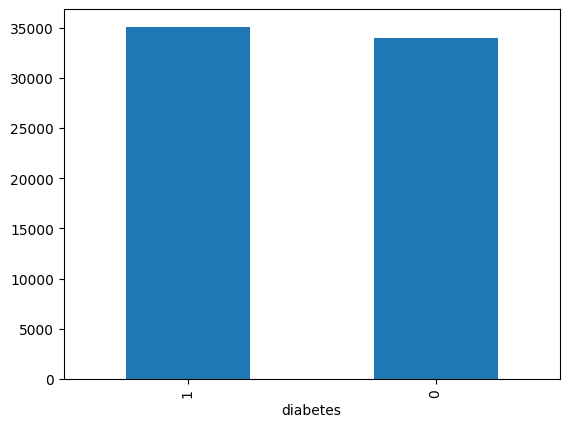

In [19]:
df_diabetes['diabetes'].value_counts().plot(kind ='bar')

#### <span style="color:orange"> 7.	Outliers:  Detect, vizualize and remove outliers.

##### <span style="color:orange"> 7.1. Detect outliers
The lower and upper boundaries beyond which data points are considered outliers are given as follows
- The lower bound is the value at the first quartile (Q1) minus 1.5 times the interquartile range (IQR).
    - Lower Bound = Q1 − 1.5*IQR
- The upper bound is the value at the third quartile (Q3) plus 1.5 times the interquartile range (IQR).
    - Upper Bound = Q3 + 1.5*IQR

##### <span style="color:orange"> Detect outliers using IQR and count them by features

In [20]:
import pandas as pd

# Function to detect outliers using IQR and count them by feature
def detect_outliers_iqr(df_diabetes, columns_with_outliers):
    outliers_count = {col: 0 for col in columns_with_outliers}
    
    for col in columns_with_outliers:
        q1 = df_diabetes[col].quantile(0.25)
        q3 = df_diabetes[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        for val in df_diabetes[col]:
            if val < lower_bound or val > upper_bound:
                outliers_count[col] += 1
                
    return outliers_count

columns_with_outliers = ['bmi', 'menthlth', 'phyhlth']
outliers_count = detect_outliers_iqr(df_diabetes, columns_with_outliers)

# Create a DataFrame to tabulate the number of outliers by feature
outliers_count_df = pd.DataFrame(list(outliers_count.items()), columns=['Feature', 'Number of Outliers'])

print("\nNumber of outliers by feature:")
print(outliers_count_df)



Number of outliers by feature:
    Feature  Number of Outliers
0       bmi                2181
1  menthlth               10703
2   phyhlth               10620


#### <span style="color:orange"> 7.2.Vizualize Outliers using Box Plots

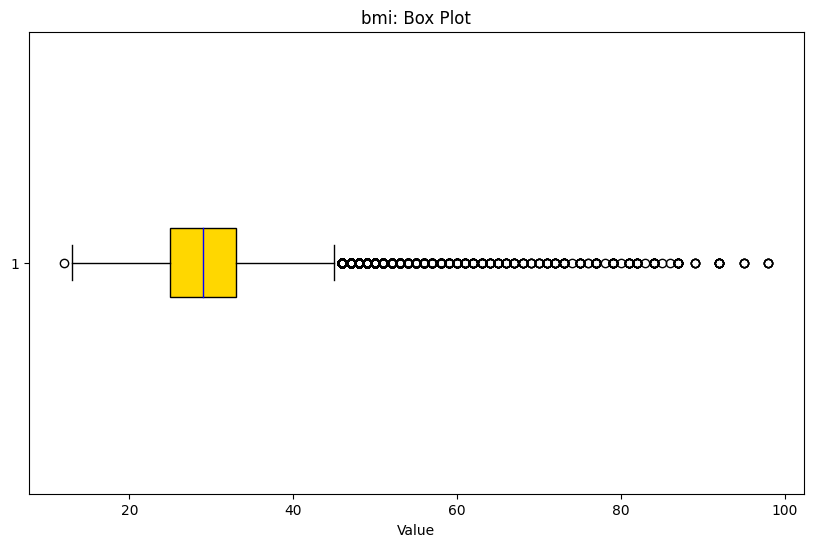

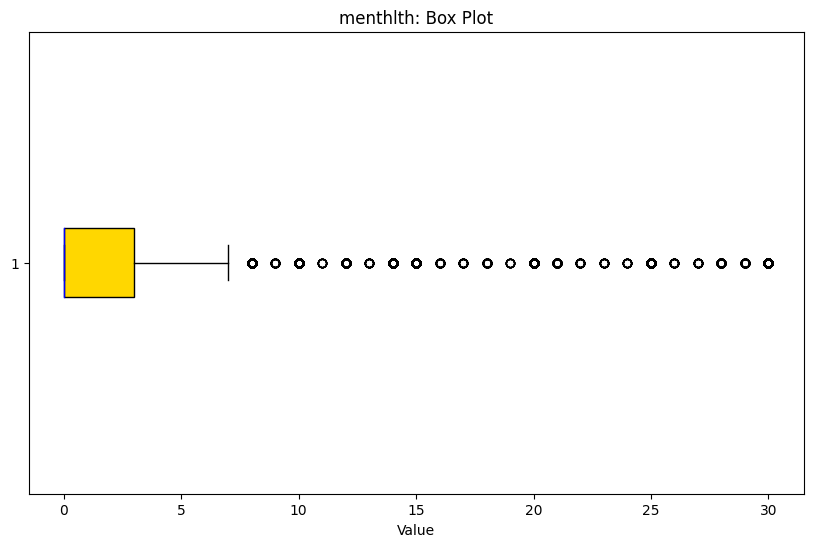

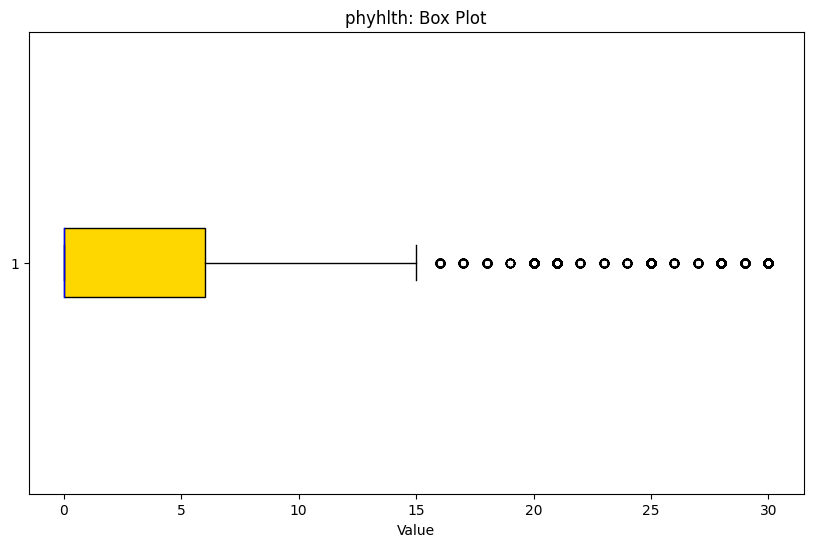

In [21]:
# List of features to plot
columns_with_outliers = ['bmi', 'menthlth', 'phyhlth']

# Loop through each feature and create a box plot
for feature in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    
    # Create box plot
    plt.boxplot(df_diabetes[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='gold', color='black'), medianprops=dict(color='blue'))

    # Add labels and title
    plt.xlabel('Value')
    plt.title(f'{feature}: Box Plot')

    # Show the plot
    plt.show()

#### <span style="color:orange"> 7.3. Detect and drop outliers from the dataframe

- Drop the outliers using the indices of the outliers obtained from the detect_outliers_iqr function

In [22]:
import pandas as pd

# Function to detect outliers using IQR for specified columns
def detect_outliers_iqr(df_diabetes, columns_with_outliers):
    outliers = set()
    for col in columns_with_outliers:
        q1 = df_diabetes[col].quantile(0.25)
        q3 = df_diabetes[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        for i, val in enumerate(df_diabetes[col]):
            if val < lower_bound or val > upper_bound:
                outliers.add(i)  # Add index to the set of outliers
    return list(outliers)

columns_with_outliers = ['bmi', 'menthlth', 'phyhlth']
outliers_indices = detect_outliers_iqr(df_diabetes, columns_with_outliers)

# Drop outliers from the DataFrame
#diabetes_clean = diabetes_clean.drop(outliers_indices)
#
# Print the cleaned DataFrame
#print("DataFrame after removing outliers:")
# print(diabetes_clean)


#### <span style="color:orange"> 8.Histogram- numerical features

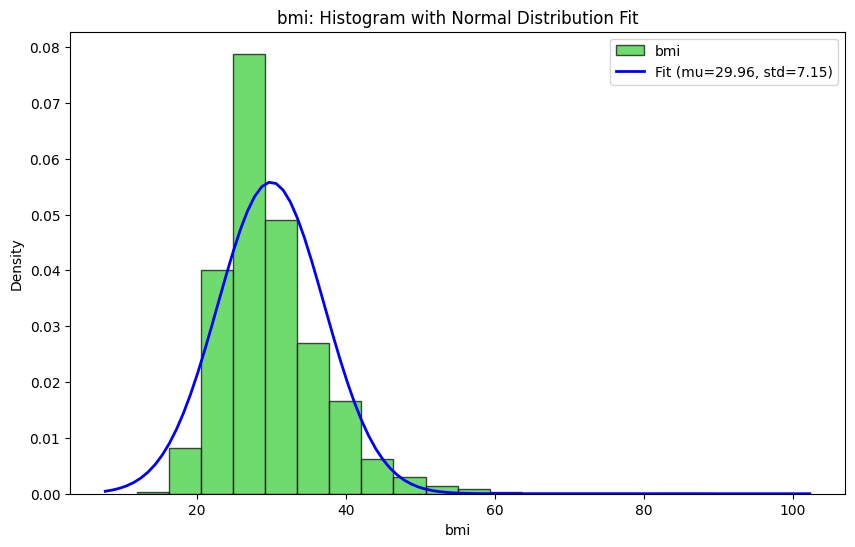

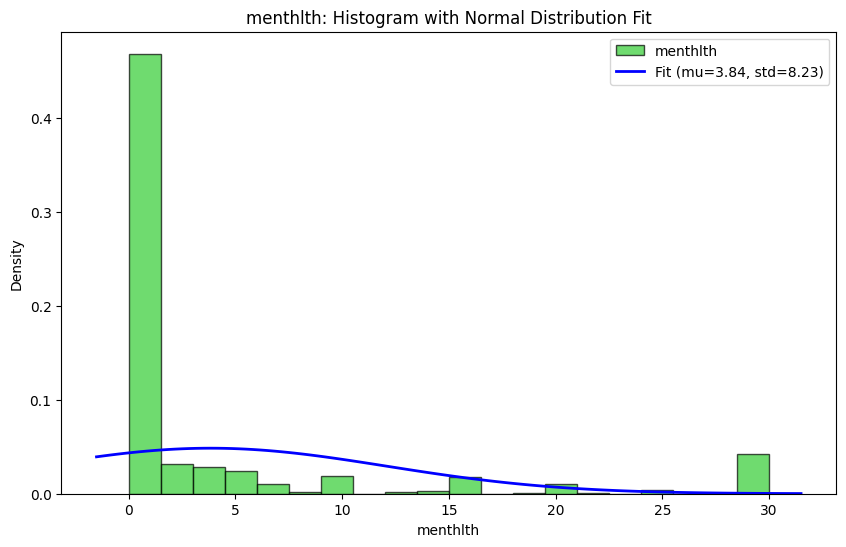

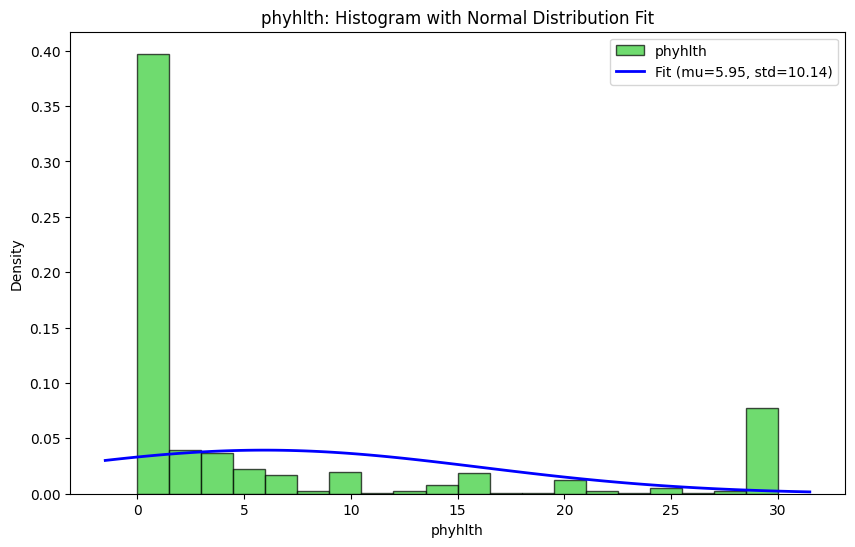

In [25]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy.stats import norm


# List of features to plot
features = ['bmi',  'menthlth', 'phyhlth']

# Loop through each feature and create histogram with normal distribution fit
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    plt.hist(df_diabetes[feature], bins=20, color='limegreen', edgecolor='black', alpha=0.7, density=True, label=feature)

    # Fit a normal distribution to the data
    mu, std = norm.fit(df_diabetes[feature])

    # Overlay normal distribution curve
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_range, mu, std)

    plt.plot(x_range, p, 'blue', linewidth=2, label=f'Fit (mu={mu:.2f}, std={std:.2f})')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'{feature}: Histogram with Normal Distribution Fit')
    plt.legend()

    # Show the plot
    plt.show()


### <span style="color:orange"> 9.	Scatter Plot/Bar Plot: used to explore relationships between variables.

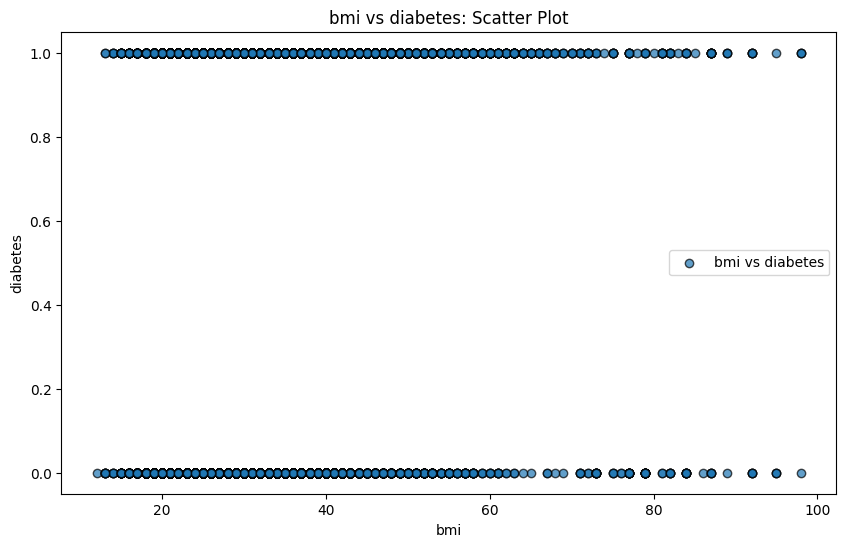

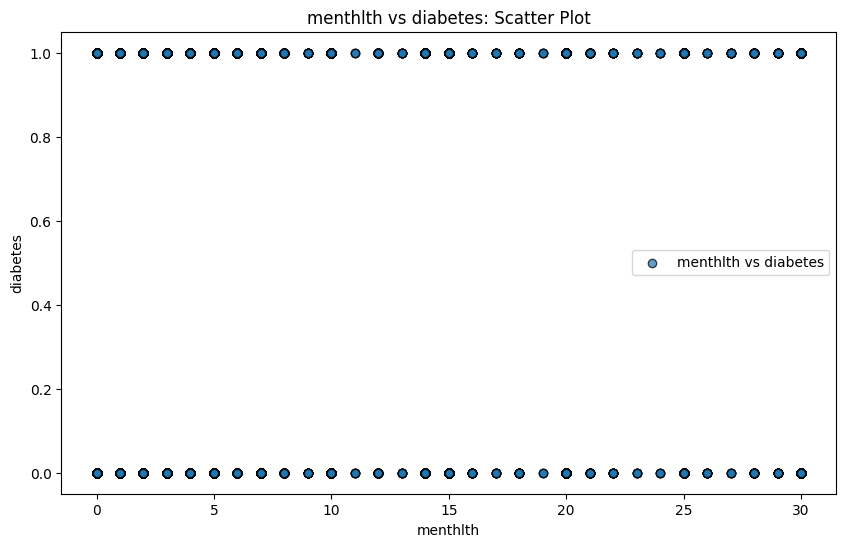

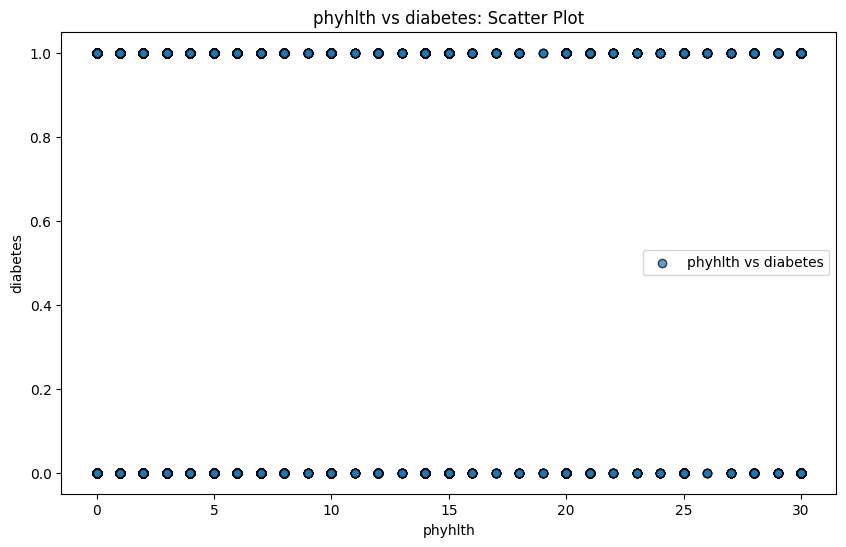

In [26]:
# List of features to plot
features = ['bmi',	'menthlth',	'phyhlth']

# Target variable
target = 'diabetes'

# Loop through each feature and create a scatter plot
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    plt.scatter(df_diabetes[feature], df_diabetes[target], alpha=0.7, edgecolor='black', label=f'{feature} vs {target}')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}: Scatter Plot')
    plt.legend()

    # Show the plot
    plt.show()

#### <span style="color:orange"> 10.	Summary Statistics: numeric features.

In [27]:
# df_diabetes.describe()

# For readability, transpose the summary statistics
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
diabetes,69057.0,0.508232,0.499936,0.0,0.0,1.0,1.0,1.0
bp,69057.0,0.571224,0.494905,0.0,0.0,1.0,1.0,1.0
chol,69057.0,0.531329,0.499021,0.0,0.0,1.0,1.0,1.0
cholcheck,69057.0,0.974803,0.156723,0.0,1.0,1.0,1.0,1.0
bmi,69057.0,29.955834,7.147972,12.0,25.0,29.0,33.0,98.0
smoker,69057.0,0.481935,0.499677,0.0,0.0,0.0,1.0,1.0
stroke,69057.0,0.063643,0.244118,0.0,0.0,0.0,0.0,1.0
heart_disease,69057.0,0.150875,0.357930,0.0,0.0,0.0,0.0,1.0
activity,69057.0,0.696483,0.459780,0.0,0.0,1.0,1.0,1.0
fruits,69057.0,0.605659,0.488712,0.0,0.0,1.0,1.0,1.0


#### <span style="color:orange">11.Correlation Matrix: 
<span style="color:orange"> Visualize the correlation between features & between features and the outcome variable(diabetes)

In [28]:
## Compute the correlation matrix including the outcome variable, 'diabetes'
correlation_matrix = df_diabetes.corr()

## Compute the correlation matrix by dropping the outcome variable, 'diabetes'
# df_diabetes_drop_target = df_diabetes.drop(columns=['diabetes'])
# correlation_matrix = df_diabetes_drop_target.corr()

# Display the correlation matrix
print(correlation_matrix)

               diabetes        bp      chol  cholcheck       bmi    smoker  \
diabetes       1.000000  0.372048  0.281399   0.118900  0.285643  0.075853   
bp             0.372048  1.000000  0.308987   0.106593  0.232372  0.078123   
chol           0.281399  0.308987  1.000000   0.088231  0.123917  0.086522   
cholcheck      0.118900  0.106593  0.088231   1.000000  0.047779 -0.002854   
bmi            0.285643  0.232372  0.123917   0.047779  1.000000  0.002761   
smoker         0.075853  0.078123  0.086522  -0.002854  0.002761  1.000000   
stroke         0.122727  0.126869  0.098166   0.023368  0.019503  0.061957   
heart_disease  0.207229  0.206776  0.178207   0.044795  0.055345  0.120457   
activity      -0.150281 -0.128307 -0.084469  -0.010072 -0.164179 -0.072401   
fruits        -0.044560 -0.031818 -0.040783   0.015853 -0.076933 -0.068192   
veggies       -0.072181 -0.059824 -0.037801  -0.001040 -0.050163 -0.023760   
alcohol       -0.098709 -0.029764 -0.027259  -0.026850 -0.060795

#### <span style="color:orange"> Correlation Heatmap

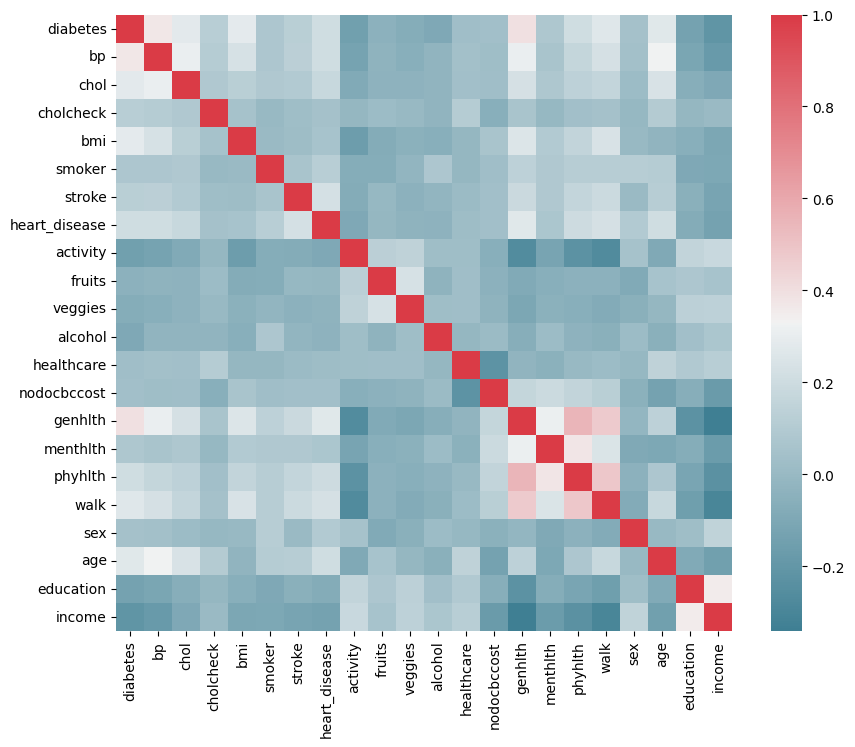

In [29]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df_diabetes.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

#### <span style="color:orange"> Correlation of features with the outcome variable, diabetes
- <span style="color:orange">sort the results, ascending order

In [30]:
df_diabetes.corr()['diabetes'].sort_values()

income          -0.210774
activity        -0.150281
education       -0.131569
alcohol         -0.098709
veggies         -0.072181
fruits          -0.044560
healthcare       0.027034
nodocbccost      0.036145
sex              0.042538
smoker           0.075853
menthlth         0.080688
cholcheck        0.118900
stroke           0.122727
phyhlth          0.206868
heart_disease    0.207229
walk             0.267082
age              0.270581
chol             0.281399
bmi              0.285643
bp               0.372048
genhlth          0.396571
diabetes         1.000000
Name: diabetes, dtype: float64

#### <span style="color:orange"> Bar graph: Correlation of features with the outcome variable, Diabetes

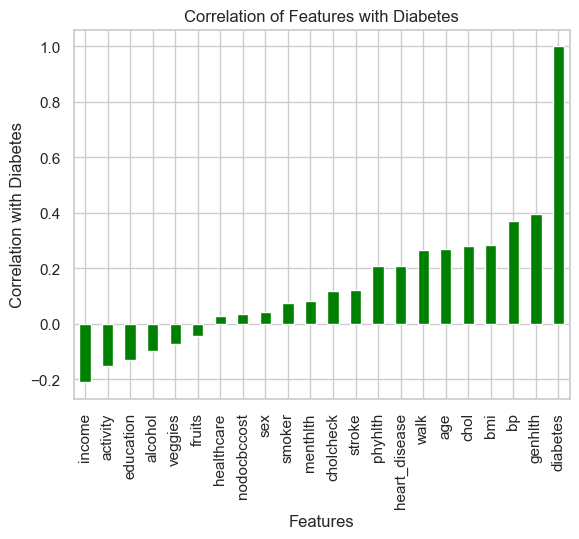

In [152]:
df_diabetes.corr()['diabetes'].sort_values().plot(kind='bar', color='green')
plt.xlabel('Features')
plt.ylabel('Correlation with Diabetes')
plt.title('Correlation of Features with Diabetes')
plt.show()

#### <span style="color:orange">12. Chi-square test for independence  of categorical variables against 'diabetes'

- The null hypothesis (Ho) in Chi-square test of independence states that there is no relationship between the categorical variables being tested. 
- Given a significance level of 0.05, if we reject the null hypothesis(False), it indicates that there is evidence to suggest a relationship between the variables. 

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# List to store the results
chi2_results = []

# Define the significance level
alpha = 0.05

df_diabetes_drop_target = df_diabetes.drop(columns=['diabetes'])

# Iterate over each column in the DataFrame
for column in df_diabetes.columns:
    # Create a contingency table between the current column and the target column
    contingency_table = pd.crosstab(df_diabetes[column], df_diabetes['diabetes'])
    
    # Perform the Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_results.append((column, chi2_stat, p_val, p_val > alpha))

# Convert the results to a DataFrame for easier analysis
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi-square statistic', 'p-value', 'Null Hypothesis (Ho)'])

# Print the DataFrame
print(" Chi-square Test of Independence")

print(chi2_results_df)

 Chi-square Test of Independence
           Column  Chi-square statistic        p-value  Null Hypothesis (Ho)
0        diabetes          69052.998973   0.000000e+00                 False
1              bp           9557.323086   0.000000e+00                 False
2            chol           5467.178055   0.000000e+00                 False
3       cholcheck            974.756080  5.513841e-214                 False
4             bmi           7206.276100   0.000000e+00                 False
5          smoker            397.032404   2.437524e-88                 False
6          stroke           1039.121611  5.633771e-228                 False
7   heart_disease           2964.403557   0.000000e+00                 False
8        activity           1558.959632   0.000000e+00                 False
9          fruits            136.935677   1.245551e-31                 False
10        veggies            359.443376   3.722096e-80                 False
11        alcohol            671.888634  3.

#### <span style="color:orange"> 13. Frequency distribution of some categorical variables:'age', 'education', 'income'

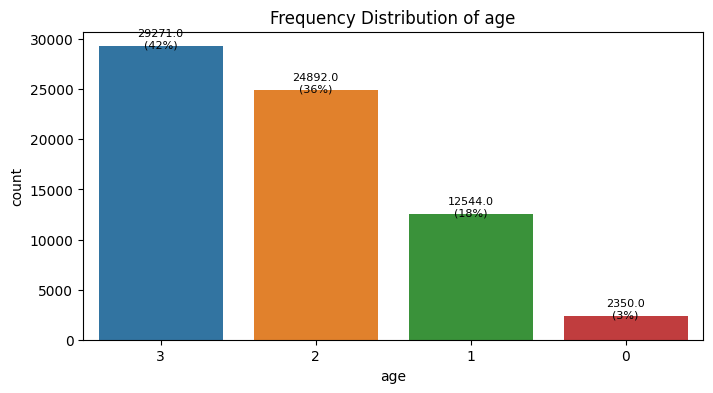

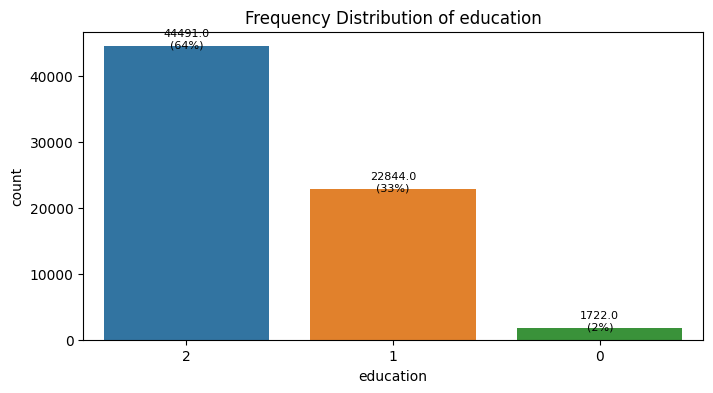

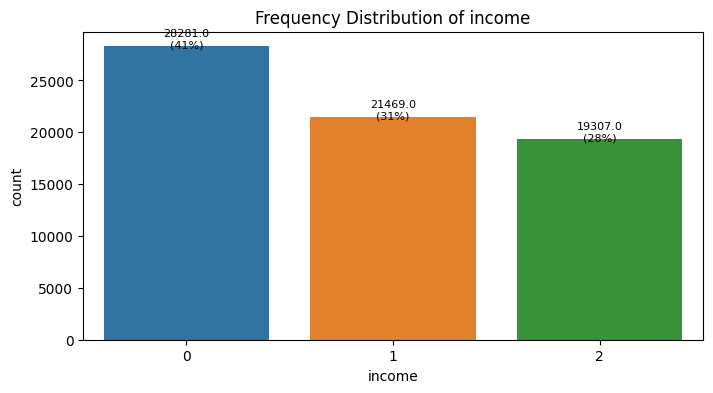

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the frequency distribution of each categorical variable
# categorical_columns = df_diabetes.select_dtypes(include=['category', 'object']).columns
age_education_income_features = ['age', 'education', 'income']

for column in age_education_income_features:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df_diabetes, x=column, order=df_diabetes[column].value_counts().index)
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=0)
    
    # Add count and percentage above each bar
    total_count = len(df_diabetes[column])
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total_count) * 100
        ax.annotate(f'{count}\n({percentage:.0f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=8, xytext=(0, 5), textcoords='offset points', color='black')
    
    plt.show()


##### <span style="color:orange"> 14.The distribution of 'diabetes' outcome by risk factors 
##### <span style="color:orange">Cross Tabulation: diabetes with bp,chol,smoker,stroke, heart_disease and alchol

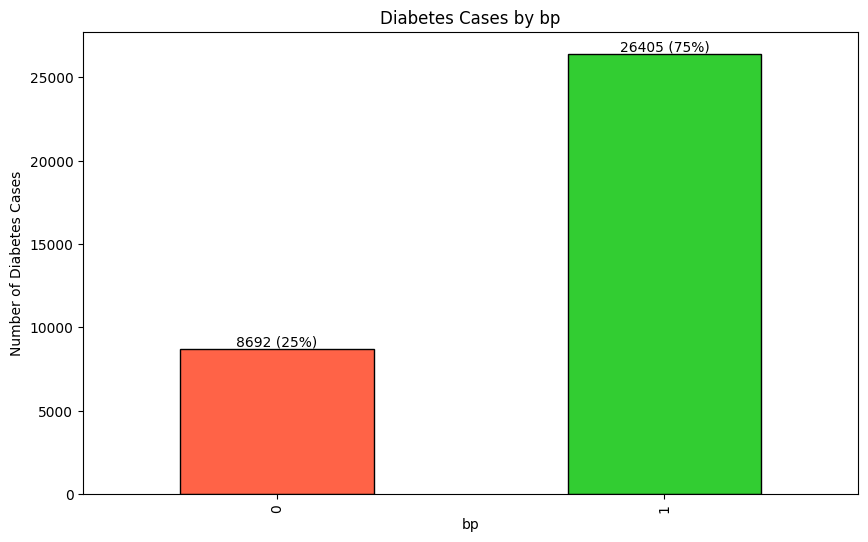

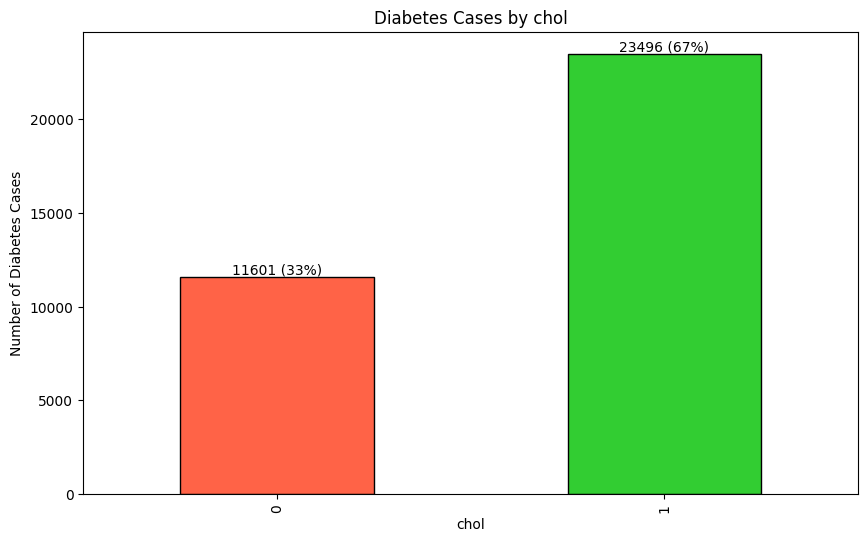

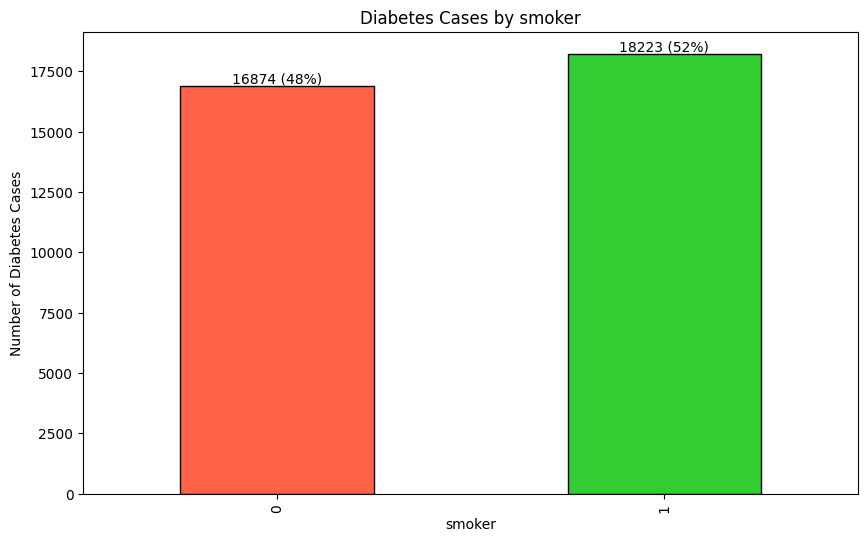

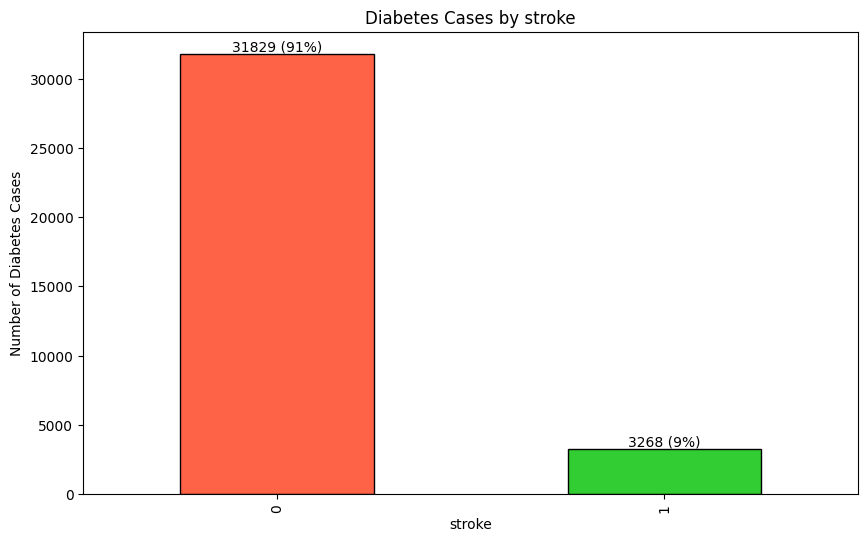

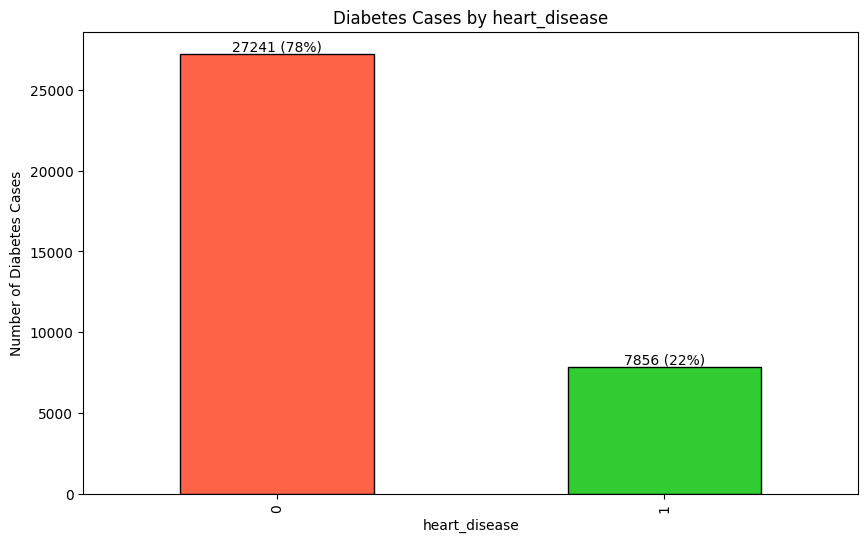

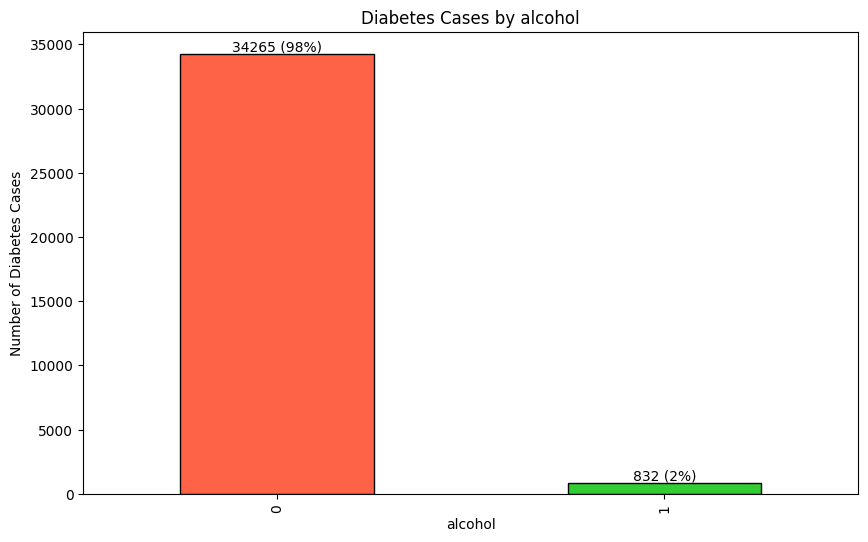

In [33]:
# List of features to plot
risk_facors_features = ['bp', 'chol', 'smoker', 'stroke', 'heart_disease', 'alcohol']

# Iterate through each feature and create a bar plot
for feature in risk_facors_features:
    # Create cross-tabulation
    cross_tab = pd.crosstab(df_diabetes[feature], df_diabetes['diabetes'])
    
    # Sum of diabetes cases for each category
    grouped = cross_tab[1]
    
    plt.figure(figsize=(10, 6))
    
    # Create alternating colors
    colors = ['tomato' if i % 2 == 0 else 'limegreen' for i in range(len(grouped))]
    
    # Plot with alternating colors
    ax = grouped.plot(kind='bar', color=colors, edgecolor='black')
    
    # Calculate the total sum for percentage calculation
    total = grouped.sum()
    
    # Annotate the bars with the sum and percentage
    for i, value in enumerate(grouped):
        percentage = (value / total) * 100
        ax.text(i, value, f'{int(round(value))} ({round(percentage)}%)', ha='center', va='bottom')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Number of Diabetes Cases')
    plt.title(f'Diabetes Cases by {feature}')
    
    # Show the plot
    plt.show()

##### <span style="color:orange"> 15. The distribution of diabetes outcome by good habit features 

##### <span style="color:orange"> Croos Tabulation: diabetes with activity, fruits and veggies


In [34]:
# croos tabulation of good_habit_features with diabetes outcome

# List of features to generate crosstabs for
good_habit_features = ['activity', 'fruits', 'veggies']

# Iterate through each feature and create a crosstab
for feature in good_habit_features:
    crosstab = pd.crosstab(df_diabetes[feature], df_diabetes['diabetes'])
    crosstab.columns = ['No Diabetes', 'Diabetes']  # Rename columns for clarity
    print(f'Crosstab for {feature}:\n', crosstab, '\n')

Crosstab for activity:
           No Diabetes  Diabetes
activity                       
0                7922     13038
1               26038     22059 

Crosstab for fruits:
         No Diabetes  Diabetes
fruits                       
0             12640     14592
1             21320     20505 

Crosstab for veggies:
          No Diabetes  Diabetes
veggies                       
0               6306      8602
1              27654     26495 



#### <span style="color:orange"> Bar graph: Good habit features with diabetes outcome

<Figure size 800x400 with 0 Axes>

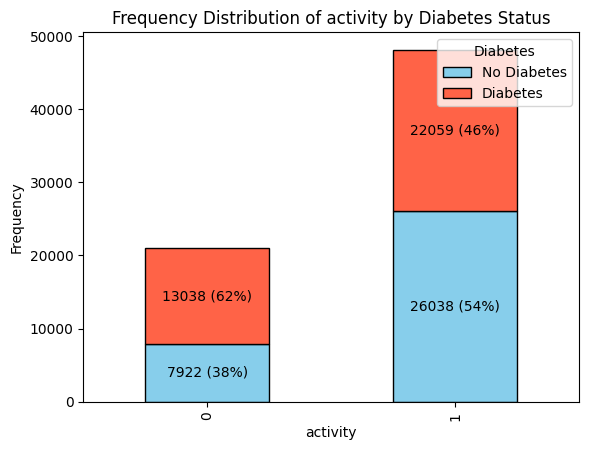

<Figure size 800x400 with 0 Axes>

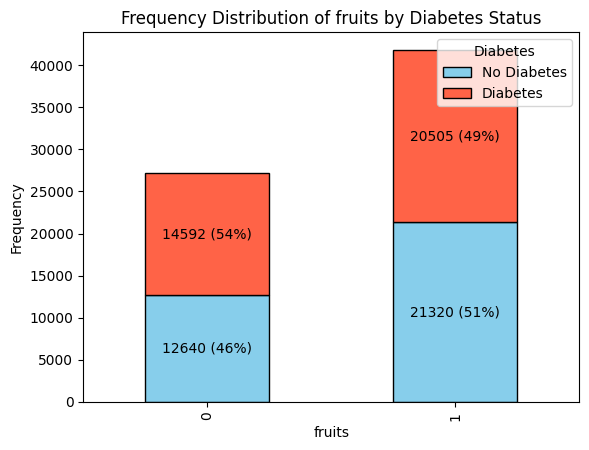

<Figure size 800x400 with 0 Axes>

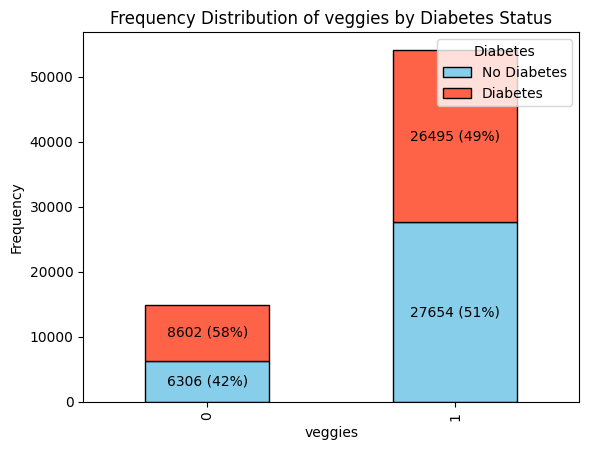

In [35]:
# List of features to plot
good_habit_features = ['activity', 'fruits', 'veggies']

# Iterate through each feature and create a frequency table
for feature in good_habit_features:
    # Create a frequency table using crosstab
    frequency_table = pd.crosstab(df_diabetes[feature], df_diabetes['diabetes'])
    
    plt.figure(figsize=(8, 4))
    
    # Plot the frequency table as a bar plot
    ax = frequency_table.plot(kind='bar', stacked=True, color=['skyblue', 'tomato'], edgecolor='black')
    
    # Annotate the bars with the counts and percentages
    for i, row in enumerate(frequency_table.values):
        for j, value in enumerate(row):
            percentage = (value / row.sum()) * 100
            ax.text(i, row[:j].sum() + value/2, f'{value} ({int(round(percentage))}%)', ha='center', va='center', color='black')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {feature} by Diabetes Status')
    
    # Add legend
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'], loc='upper right')
    
    # Show the plot
    plt.show()

####  <span style="color:orange"> 16. Prevalence of Diabetes by age, gender, education and income level

C:\Users\yitay\AppData\Local\Temp\ipykernel_8224\3554196671.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prevalence, x=feature, y='diabetes', ci=None)


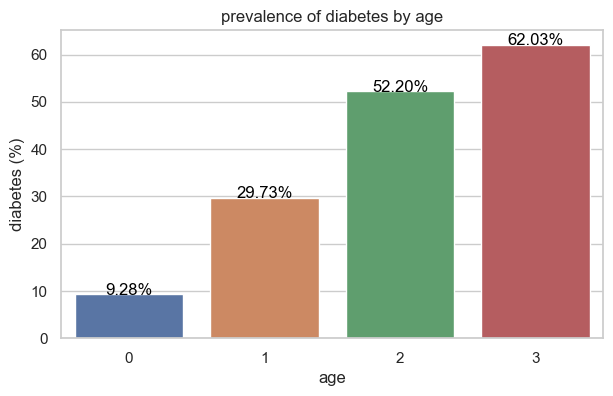

C:\Users\yitay\AppData\Local\Temp\ipykernel_8224\3554196671.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prevalence, x=feature, y='diabetes', ci=None)


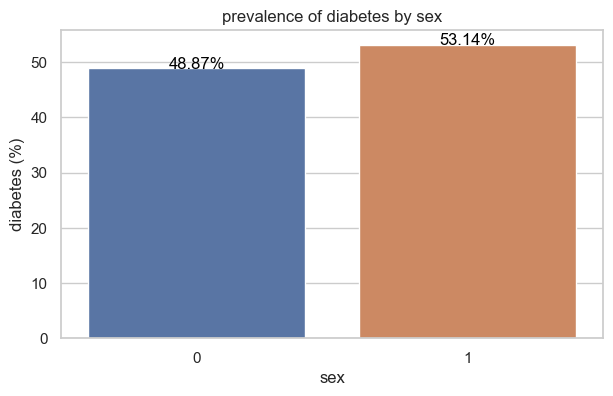

C:\Users\yitay\AppData\Local\Temp\ipykernel_8224\3554196671.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prevalence, x=feature, y='diabetes', ci=None)


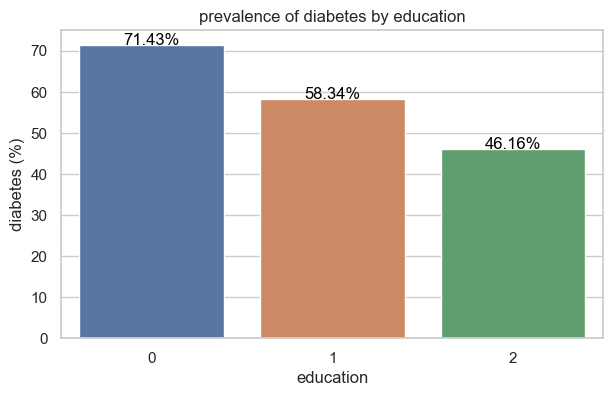

C:\Users\yitay\AppData\Local\Temp\ipykernel_8224\3554196671.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=prevalence, x=feature, y='diabetes', ci=None)


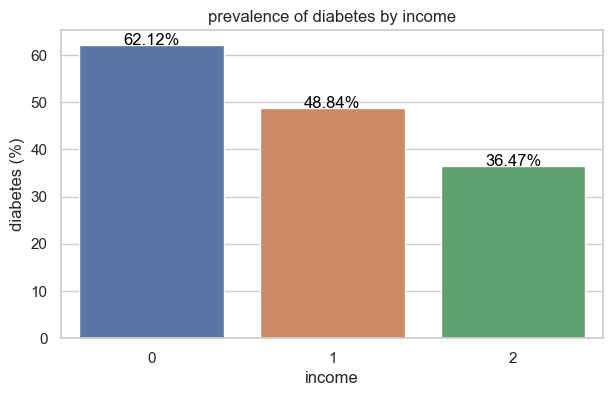

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")

# List of categorical features to plot
features = ['age', 'sex', 'education', 'income']

# Creating plots using a for loop
for feature in features:
    plt.figure(figsize=(7, 4))
    prevalence = df_diabetes.groupby(feature)['diabetes'].mean().reset_index()
    prevalence['diabetes'] = prevalence['diabetes'] * 100  # Convert to percentage
    prevalence = prevalence.sort_values(by='diabetes', ascending=False)  # Sort by prevalence in descending order
    sns.barplot(data=prevalence, x=feature, y='diabetes', ci=None)
    plt.title(f'prevalence of diabetes by {feature}')
    plt.ylabel('diabetes (%)')
    plt.xlabel(feature)
    plt.xticks(rotation=0)
    
    # Adding percentages on top of the bars
    for index, row in prevalence.iterrows():
        plt.text(index, row['diabetes'], f"{row['diabetes']:.2f}%", color='black', ha="center")
    
    plt.show()


#### option 2
### <span style="color:orange"> Prevalence of Diabetes by age, gender, education and income level

<Figure size 800x400 with 0 Axes>

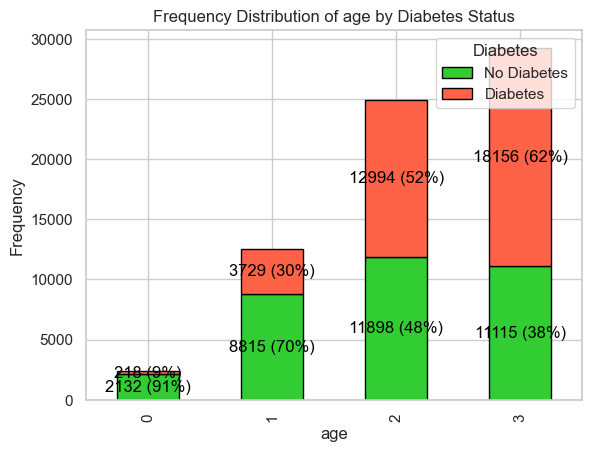

<Figure size 800x400 with 0 Axes>

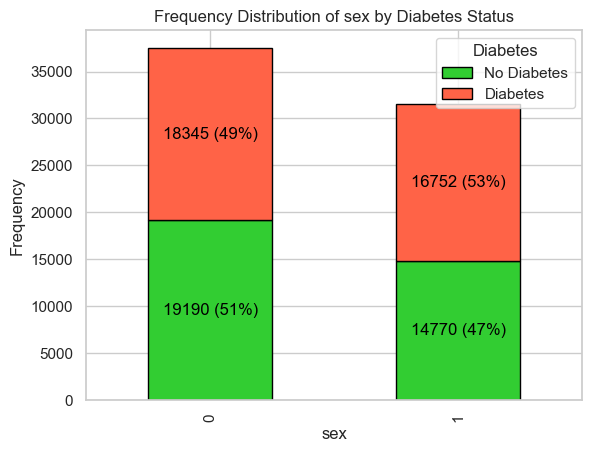

<Figure size 800x400 with 0 Axes>

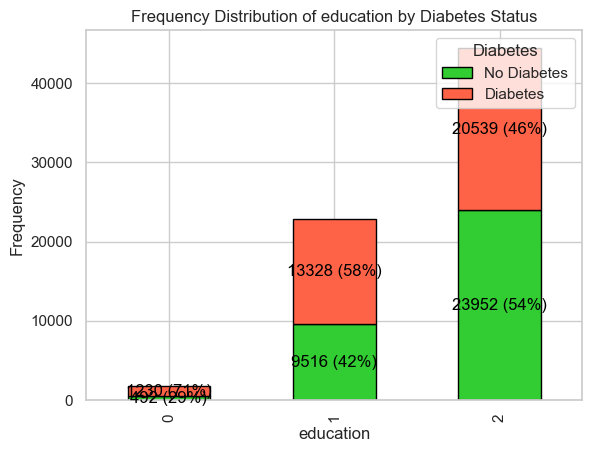

<Figure size 800x400 with 0 Axes>

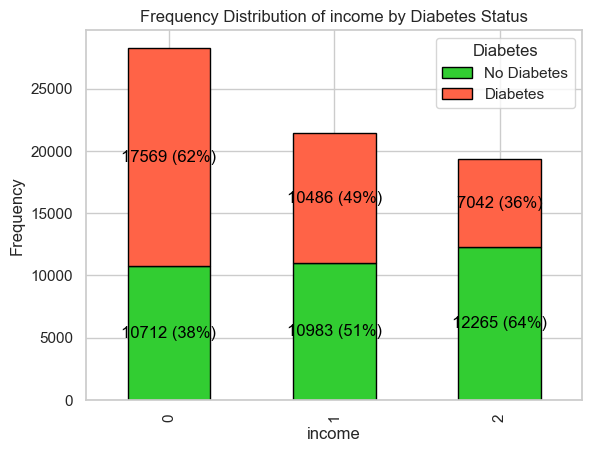

In [37]:
# List of features to plot
prevalence_features = ['age', 'sex', 'education', 'income']

# Iterate through each feature and create a frequency table
for feature in prevalence_features:
    # Create a frequency table using crosstab
    frequency_table = pd.crosstab(df_diabetes[feature], df_diabetes['diabetes'])
    
    plt.figure(figsize=(8, 4))
    
    # Plot the frequency table as a bar plot
    ax = frequency_table.plot(kind='bar', stacked=True, color=['limegreen', 'tomato'], edgecolor='black')
    
    # Annotate the bars with the counts and percentages
    for i, row in enumerate(frequency_table.values):
        for j, value in enumerate(row):
            percentage = (value / row.sum()) * 100
            ax.text(i, row[:j].sum() + value/2, f'{value} ({int(round(percentage))}%)', ha='center', va='center', color='black')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {feature} by Diabetes Status')
    
    # Add legend
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'], loc='upper right')
    
    # Show the plot
    plt.show()

######   ===========================

#### <span style="color:orange"> Save the 'df.diabetes' dataset as a separate clean CSV file
- The location of the saved 'diabetes_clean.csv' file will be in the current working directory of my Python environment at the time i run this script

In [38]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame

# Save the DataFrame to a CSV file without the index
df_diabetes.to_csv('diabetes_clean.csv', index=False)
